In [1]:
!pip install tensorflow keras


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical



In [3]:
 # Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
 # Preprocess the data
X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension (28, 28, 1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = tf.image.resize(X_train, (128, 128))
X_test = tf.image.resize(X_test, (128, 128))

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0
# Replicate the grayscale channel to create 3 channels
X_train = tf.repeat(X_train, 3, axis=-1) # Repeat grayscale channel 3 times
X_test = tf.repeat(X_test, 3, axis=-1)
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Print shape of the dataset
print(f"x_train_resized shape: {X_train.shape}")
print(f"x_test_resized shape: {X_test.shape}")


11490434/11490434 [==============================] - 0s 0us/step
x_train_resized shape: (60000, 128, 128, 3)
x_test_resized shape: (10000, 128, 128, 3)


In [4]:
 # Load the VGG16 model pre-trained on ImageNet, excluding the top layer
 vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
 # Freeze the base layers (optional)
 for layer in vgg_base.layers:
    layer.trainable = False
 # Build a new model on top of VGG16 for MNIST classification
 model = Sequential([
    vgg_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes for MNIST
 ])
 # Compile the model
 model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [5]:
 history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 505s 269ms/step - loss: 0.1973 - accuracy: 0.9493 - val_loss: 0.0444 - val_accuracy: 0.9879
Epoch 2/5
1875/1875 [==============================] - 517s 276ms/step - loss: 0.0596 - accuracy: 0.9827 - val_loss: 0.0338 - val_accuracy: 0.9898
Epoch 3/5
1875/1875 [==============================] - 517s 276ms/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0288 - val_accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 507s 270ms/step - loss: 0.0376 - accuracy: 0.9887 - val_loss: 0.0247 - val_accuracy: 0.9915
Epoch 5/5
1875/1875 [==============================] - 507s 271ms/step - loss: 0.0321 - accuracy: 0.9903 - val_loss: 0.0257 - val_accuracy: 0.9914


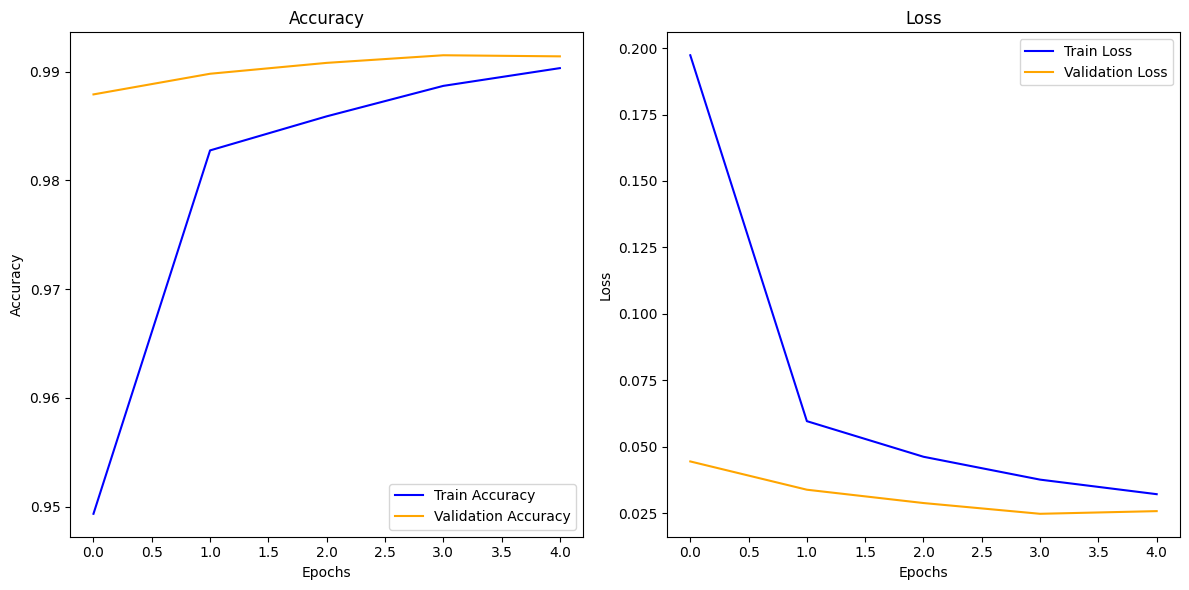

In [6]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


313/313 [==============================] - 73s 234ms/step - loss: 0.0257 - accuracy: 0.9914
Test Loss: 0.025747347623109818
Test Accuracy: 0.9914000034332275


Fine Tunning

In [12]:
 # Unfreeze some layers for fine-tuning
for layer in model.layers[0].layers[-4:]:
  layer.trainable = True


In [13]:
 # Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
loss='categorical_crossentropy',
metrics=['accuracy'])
 # Retrain the model
history_fine_tune = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 743s 395ms/step - loss: 0.0259 - accuracy: 0.9920 - val_loss: 0.0209 - val_accuracy: 0.9931
Epoch 2/5
1875/1875 [==============================] - 745s 397ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0189 - val_accuracy: 0.9933
Epoch 3/5
1875/1875 [==============================] - 731s 390ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0194 - val_accuracy: 0.9942
Epoch 4/5
1875/1875 [==============================] - 732s 391ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0179 - val_accuracy: 0.9942
Epoch 5/5
1875/1875 [==============================] - 742s 396ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0188 - val_accuracy: 0.9943


In [14]:
 # Evaluate the fine-tuned model
 test_loss, test_accuracy = model.evaluate(X_test, y_test)
 print(f'Test accuracy after fine-tuning: {test_accuracy:.4f}')

313/313 [==============================] - 72s 229ms/step - loss: 0.0188 - accuracy: 0.9943
Test accuracy after fine-tuning: 0.9943


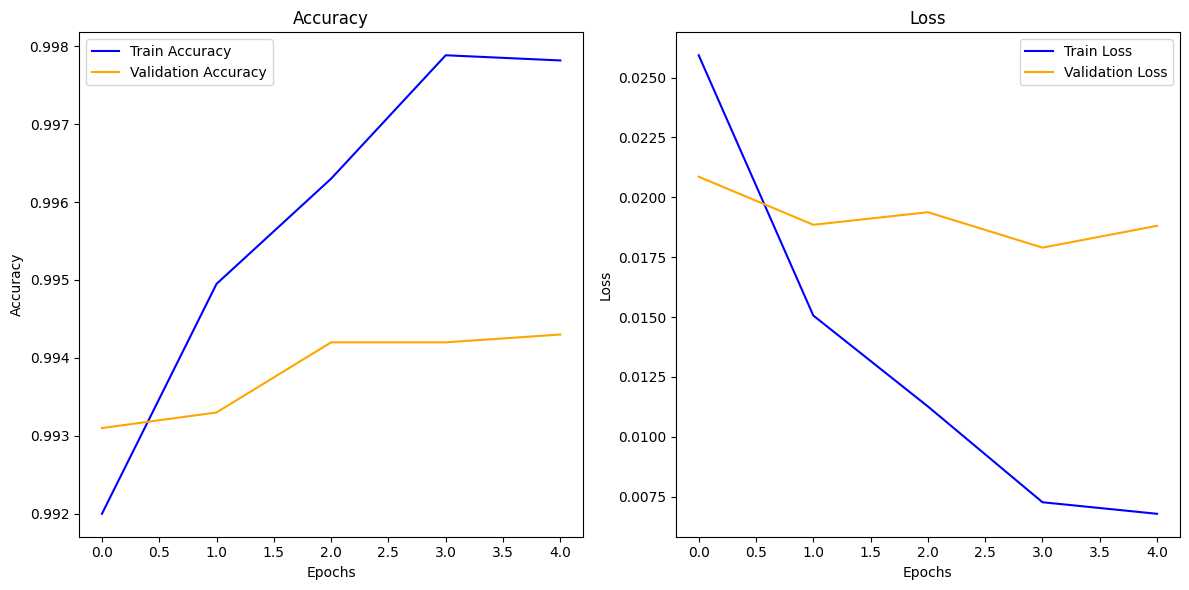

In [16]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_fine_tune.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_fine_tune.history['loss'], label='Train Loss', color='blue')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 # Set up data augmentation
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
train_generator = datagen.flow(X_train, y_train, batch_size=32)
 # Train the model using augmented data
history_augmented = model.fit(train_generator, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 747s 398ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0180 - val_accuracy: 0.9941
Epoch 2/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9957